# **ĐỒ ÁN CUỐI KÌ THU THẬP VÀ TIỀN XỬ LÝ DỮ LIỆU.**

ĐỀ TÀI: PHÂN TÍCH CÁC YÊU TỐ ẢNH HƯỞNG ĐẾN ĐẾN RATING CỦA MỘT ĐẦU SÁCH.

# PHẦN 3: BUID MODEL.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Kiểm tra lại dữ liệu lần nữa.

In [ ]:
import pandas as pd
df= pd.read_csv('/content/drive/MyDrive/Đồ Án-DS105/Data/Data_clean.csv')
del df['Unnamed: 0']
df.head(5)

,id,title,series,author,rating_count,review_count,number_of_pages,date_published,publisher,genre,isbn,description,awards,rating
0,136251,Harry Potter and the Deathly Hallows,Harry Potter,J.K. Rowling,3105877.0,71353.0,759.0,2007.0,Arthur A. Levine Books,Fantasy,0,1483,7,4.61
1,2767052,The Hunger Games,The Hunger Games,Suzanne Collins,7026399.0,179928.0,374.0,2008.0,Scholastic Press,Young Adult,1,1298,40,4.32
2,77203,The Kite Runner,Single,Khaled Hosseini,2654792.0,80553.0,371.0,2004.0,Riverhead Books,Fiction,0,1065,7,4.31
3,19063,The Book Thief,Single,Markus Zusak,2062051.0,121442.0,552.0,2006.0,Alfred A. Knopf,Historical,0,1383,19,4.38
4,1,Harry Potter and the Half-Blood Prince,Harry Potter,J.K. Rowling,2709343.0,44644.0,652.0,2006.0,Scholastic Inc.,Fantasy,0,1268,3,4.57


In [ ]:
df.isnull().sum()

id                 0
title              0
series             0
author             0
rating_count       0
review_count       0
number_of_pages    0
date_published     0
publisher          0
genre              0
isbn               0
description        0
awards             0
rating             0
dtype: int64

In [ ]:
df.dtypes

id                   int64
title               object
series              object
author              object
rating_count       float64
review_count       float64
number_of_pages    float64
date_published     float64
publisher           object
genre               object
isbn                 int64
description          int64
awards               int64
rating             float64
dtype: object

# 2. Xử lý lại tập dữ liệu trước khi tạo model.

Do các cột không là số (series, publisher, genre) đều không là các giá trị binary hoặc có thể xác định trước nên không thể tách thành các cột. Mình sẽ xử lý bằng cách gán số cho nó . Mỗi unique sẽ được gán 1 con số riêng khác nhau

- Pickle có thể được sử dụng để tuần tự hóa cấu trúc đối tượng Python, đề cập đến quá trình chuyển đổi một đối tượng trong bộ nhớ thành một luồng byte có thể được lưu trữ dưới dạng tệp nhị phân trên đĩa. ... Khi chúng tôi tải nó trở lại chương trình Python, tệp nhị phân này có thể được hủy tuần tự hóa trở lại đối tượng Python.
- Hiểu đơn giản là đưa biến object thành int.

In [ ]:
import pickle

In [ ]:
def save_map(map, map_name):
  with open(map_name + '.pkl', 'wb') as f:
    pickle.dump(map, f, pickle.HIGHEST_PROTOCOL)

def load_map(map_name):
  with open(map_name + '.pkl', 'rb') as f:
    return pickle.load(f)

In [ ]:
def createMappingTable(df, column, text_digit_vals):
  df_copy = df.copy()
  text_digit_vals_column = {}
  def convertToInt(text):
    if text != text or text == '' or text == 0:
      return 0
    return int(text_digit_vals_column[text])
  column_contents = df_copy[column].values.tolist()
  unique_elements = set(column_contents)
  x = 1
  for unique in unique_elements:
    if unique not in text_digit_vals_column and unique == unique and unique != 0:
      text_digit_vals_column[unique] = x
      x += 1
  text_digit_vals[column] = text_digit_vals_column
  df_copy[column] = list(map(convertToInt, df_copy[column]))
  return df_copy

In [ ]:
text_digit_vals = {}
df = createMappingTable(df,'series', text_digit_vals)
df = createMappingTable(df,'publisher', text_digit_vals)
df = createMappingTable(df,'genre', text_digit_vals)

In [ ]:
df = createMappingTable(df,'author', text_digit_vals)

In [ ]:
df

,id,title,series,author,rating_count,review_count,number_of_pages,date_published,publisher,genre,isbn,description,awards,rating
0,136251,Harry Potter and the Deathly Hallows,1208,1620,3105877.0,71353.0,759.0,2007.0,193,27,0,1483,7,4.61
1,2767052,The Hunger Games,483,4235,7026399.0,179928.0,374.0,2008.0,1764,1,1,1298,40,4.32
2,77203,The Kite Runner,1644,3945,2654792.0,80553.0,371.0,2004.0,1588,8,0,1065,7,4.31
3,19063,The Book Thief,1644,4756,2062051.0,121442.0,552.0,2006.0,1526,45,0,1383,19,4.38
4,1,Harry Potter and the Half-Blood Prince,1208,1620,2709343.0,44644.0,652.0,2006.0,1324,27,0,1268,3,4.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8249,17706813,The Return of the Omniscient Narrator: Author...,1644,1774,8.0,0.0,312.0,2013.0,89,42,1,0,0,4.25
8250,22928980,The First Collection of Criticism by a Living ...,1644,3469,1828.0,193.0,201.0,2015.0,2307,15,1,1593,0,4.01
8251,3688884,"The Invention of Air: A Story of Science, Fait...",1644,576,3040.0,404.0,254.0,2009.0,1588,31,1,2447,0,3.81
8252,3507618,Fruitless Fall: The Collapse of the Honey Bee ...,1644,3531,685.0,136.0,288.0,2008.0,23,50,1,1788,0,4.31


# 3. Tạo dữ liệu train và test.

In [ ]:
X = df.drop(['id', 'rating','title','date_published','isbn'], axis=1)
y = df['rating'].values

In [ ]:
X

,series,author,rating_count,review_count,number_of_pages,publisher,genre,description,awards
0,1208,1620,3105877.0,71353.0,759.0,193,27,1483,7
1,483,4235,7026399.0,179928.0,374.0,1764,1,1298,40
2,1644,3945,2654792.0,80553.0,371.0,1588,8,1065,7
3,1644,4756,2062051.0,121442.0,552.0,1526,45,1383,19
4,1208,1620,2709343.0,44644.0,652.0,1324,27,1268,3
...,...,...,...,...,...,...,...,...,...
8249,1644,1774,8.0,0.0,312.0,89,42,0,0
8250,1644,3469,1828.0,193.0,201.0,2307,15,1593,0
8251,1644,576,3040.0,404.0,254.0,1588,31,2447,0
8252,1644,3531,685.0,136.0,288.0,23,50,1788,0


In [ ]:
y

array([4.61, 4.32, 4.31, ..., 3.81, 4.31, 4.54])

- Phân chia dữ liệu.

In [ ]:
from sklearn.model_selection import train_test_split
import re

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size=0.2,random_state=365)

# 4. Xây dựng model.

- Ở phần này chúng tôi sử dụng 3 model là:
+ Linear Regression.
+ Support Vector Regression (C=0.5, gamma=0.1)
+ Multi-Layer Perceptron Regressor (Neural Network)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# Linear Regression
reg_LR = make_pipeline(StandardScaler(), LinearRegression())
# Support Vector Regression
reg_SVR = make_pipeline(StandardScaler(), SVR(C=0.5, gamma=0.1))
# MLP Regression
reg_MLPR = make_pipeline(StandardScaler(), MLPRegressor(random_state=1, max_iter=500))

In [ ]:
reg_LR.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [ ]:
reg_SVR.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=0.5, gamma=0.1))])

In [ ]:
reg_MLPR.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpregressor', MLPRegressor(max_iter=500, random_state=1))])

In [ ]:
reg_poly =[]
# Chung ta sẽ file model từ bậc 2 đến bậc 7
for i in range(5):
  a = make_pipeline(StandardScaler(), PolynomialFeatures(degree=i+2, include_bias= False),LinearRegression())
  reg_poly.append(a)

In [ ]:
model_poly =[]
for i in range(5):
  reg_poly[i].fit(X_train, y_train)
  model_poly.append(reg_poly[i])

# 5. Đánh giá model.

In [ ]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
y_pre_LR = reg_LR.predict(X)
y_pre_SVR = reg_SVR.predict(X)
y_pre_MLPR = reg_MLPR.predict(X)
y_pre_poly =[]
for i in range(5):
  a=reg_poly[i].predict(X)
  y_pre_poly.append(a)

## Đánh giá bằng đồ thị học.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


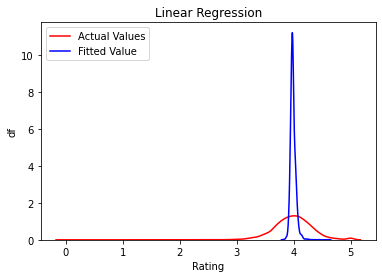

In [ ]:
# Phac họa distribution plot đánh giá mô hình Linear Regression.
ax1= sns.distplot(y,hist=False,color="r",label="Actual Values");
ax2= sns.distplot(y_pre_LR,hist=False,color="b",label="Fitted Value");
plt.title('Linear Regression');
plt.ylabel('df');
plt.xlabel('Rating');
plt.legend(['Actual Values', 'Fitted Value']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


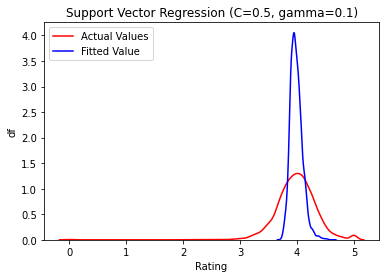

In [ ]:
# Phac họa distribution plot đánh giá mô hình Support Vector Regression (C=0.5, gamma=0.1)
ax1= sns.distplot(y,hist=False,color="r",label="Actual Values");
ax2= sns.distplot(y_pre_SVR,hist=False,color="b",label="Fitted Value");
plt.title('Support Vector Regression (C=0.5, gamma=0.1)');
plt.ylabel('df');
plt.xlabel('Rating');
plt.legend(['Actual Values', 'Fitted Value']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


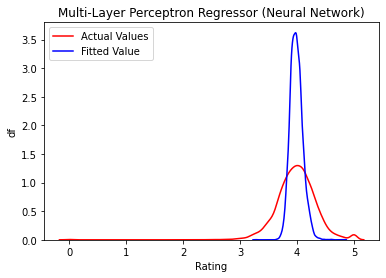

In [ ]:
ax1= sns.distplot(y,hist=False,color="r",label="Actual Values");
ax2= sns.distplot(y_pre_MLPR,hist=False,color="b",label="Fitted Value");
plt.title('Multi-Layer Perceptron Regressor (Neural Network)');
plt.ylabel('df');
plt.xlabel('Rating');
plt.legend(['Actual Values', 'Fitted Value']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


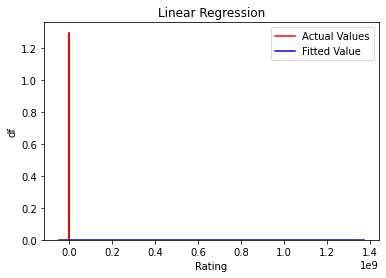

In [ ]:
ax1= sns.distplot(y,hist=False,color="r",label="Actual Values");
ax2= sns.distplot(y_pre_poly[4],hist=False,color="b",label="Fitted Value");
plt.title('Linear Regression');
plt.ylabel('df');
plt.xlabel('Rating');
plt.legend(['Actual Values', 'Fitted Value']);

## Đánh giá bằng độ đo.

In [ ]:
def scoreModel(y_true, y_pre):
  """
  Parameters: y_true: , y_pre: predicted values
  Returns: MAE, MSE, R2 metric 
  """
  MAE_score = MAE(y_true, y_pre)
  MSE_score = MSE(y_true, y_pre)
  R2_score = R2(y_true, y_pre)
  return MAE_score, MSE_score, R2_score


In [ ]:
def getResult(X, y):
  y_pre_LR = reg_LR.predict(X)
  y_pre_SVR = reg_SVR.predict(X)
  y_pre_MLPR = reg_MLPR.predict(X)
  LR = scoreModel(y, y_pre_LR)
  SVR = scoreModel(y, y_pre_SVR)
  MLPR = scoreModel(y, y_pre_MLPR)
  Poly= []
  for i in range(5):
    b = model_poly[i].predict(X)
    a=scoreModel(y, b)
    Poly.append(list(a))
  result_table = pd.DataFrame([['Linear Regression'] + list(LR),
                ['Support Vector Regression (C=0.5, gamma=0.1)'] + list(SVR),
                ['Multi-Layer Perceptron Regressor (Neural Network)'] + list(MLPR),
                ['Poly Regressor (degree = 2)'] + Poly[0],
                ['Poly Regressor (degree = 3)'] + Poly[1],
                ['Poly Regressor (degree = 4)'] + Poly[2],
                ['Poly Regressor (degree = 5)'] + Poly[3],
                ['Poly Regressor (degree = 6)'] + Poly[4]],
                columns=['Model', 'MAE', 'MSE', 'R2'])
  return result_table

In [ ]:
getResult(X_train, y_train)

MAE:  0.24554009566209947 
MSE:  0.11309133184626974 
R2:  0.05928633560965435 

MAE:  0.22778632719862044 
MSE:  0.10329059988432283 
R2:  0.1408105543726219 

MAE:  0.23857149357938034 
MSE:  0.10719655472156231 
R2:  0.10832013244640837 

MAE:  0.2432603543713672 
MSE:  0.11098436769118712 
R2:  0.0768124354327705 

MAE:  0.23644810863798446 
MSE:  0.10612847564104945 
R2:  0.11720460280576117 

MAE:  0.2233583238739436 
MSE:  0.09908806624482239 
R2:  0.17576797113655362 

MAE:  0.1930792279586526 
MSE:  0.08309225043607239 
R2:  0.30882399106933656 

MAE:  0.09528761124402552 
MSE:  0.04087192478116982 
R2:  0.6600201137975275 



,Model,MAE,MSE,R2
0,Linear Regression,0.245540,0.113091,0.059286
1,"Support Vector Regression (C=0.5, gamma=0.1)",0.227786,0.103291,0.140811
2,Multi-Layer Perceptron Regressor (Neural Network),0.238571,0.107197,0.108320
3,Poly Regressor (degree = 2),0.243260,0.110984,0.076812
4,Poly Regressor (degree = 3),0.236448,0.106128,0.117205
5,Poly Regressor (degree = 4),0.223358,0.099088,0.175768
6,Poly Regressor (degree = 5),0.193079,0.083092,0.308824
7,Poly Regressor (degree = 6),0.095288,0.040872,0.660020


In [ ]:
getResult(X_valid, y_valid)

MAE:  0.24815037372395418 
MSE:  0.12360367471081639 
R2:  0.04775283211369952 

MAE:  0.240550511155296 
MSE:  0.11977946094491047 
R2:  0.07721471289107618 

MAE:  0.24690641869040256 
MSE:  0.12123710416598298 
R2:  0.06598497694428962 

MAE:  0.24555113912940174 
MSE:  0.12263860564032297 
R2:  0.05518775903914963 

MAE:  0.24820099419037508 
MSE:  0.12488621520496279 
R2:  0.03787209389044088 

MAE:  0.9114432296574585 
MSE:  286.5183098418017 
R2:  -2206.3473926463257 

MAE:  83.97422296677723 
MSE:  4491835.200849917 
R2:  -34605259.3907497 

MAE:  1177519.3549314102 
MSE:  1219021513477918.2 
R2:  -9391385705300864.0 



,Model,MAE,MSE,R2
0,Linear Regression,2.481504e-01,1.236037e-01,4.775283e-02
1,"Support Vector Regression (C=0.5, gamma=0.1)",2.405505e-01,1.197795e-01,7.721471e-02
2,Multi-Layer Perceptron Regressor (Neural Network),2.469064e-01,1.212371e-01,6.598498e-02
3,Poly Regressor (degree = 2),2.455511e-01,1.226386e-01,5.518776e-02
4,Poly Regressor (degree = 3),2.482010e-01,1.248862e-01,3.787209e-02
5,Poly Regressor (degree = 4),9.114432e-01,2.865183e+02,-2.206347e+03
6,Poly Regressor (degree = 5),8.397422e+01,4.491835e+06,-3.460526e+07
7,Poly Regressor (degree = 6),1.177519e+06,1.219022e+15,-9.391386e+15
